# Auswertungen zu Autoscout24_final

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter

df = pd.read_csv("Autoscout24_final.csv")

df.head()

,Kilometerstand,Marke,Modell,Kraftstoff,Getriebe,Zustandsart,Preis,PS,Baujahr,Segment,Herkunftsland,Hersteller_Gruppe
0,235000,BMW,316,Diesel,Manuell,Gebraucht,6800,116,2011,MINIS,Deutschland,BMW Group
1,92800,Volkswagen,Golf,Benzin,Manuell,Gebraucht,6877,122,2011,KOMPAKTKLASSE,Deutschland,Volkswagen AG
2,149300,SEAT,Exeo,Benzin,Manuell,Gebraucht,6900,160,2011,MINIS,Spanien,Volkswagen AG
3,96200,Renault,Megane,Benzin,Manuell,Gebraucht,6950,110,2011,KOMPAKTKLASSE,Frankreich,Renault-Nissan-Allianz
4,156000,Peugeot,308,Benzin,Manuell,Gebraucht,6950,156,2011,KOMPAKTKLASSE,Frankreich,Stellantis-Gruppe


In [129]:

# Sortiere die Daten nach der Spalte 'PS'
df = df.sort_values(by='PS')

# Hole die Daten aus der Spalte 'PS'
ps_data = df['PS']

# Zeige die ersten 100 und letzten 100 Einträge
print("PS")
#print(ps_data.head(100))
print(ps_data.tail(100))

PS
29916    605
23110    605
6098     605
24761    605
39744    608
        ... 
20992    775
43391    795
17815    799
23654    799
42131    850
Name: PS, Length: 100, dtype: int64


#### • Welchen Einfluss haben Angebotstyp, Art des Antriebs, Pferdestärke, Kilometerzahl und Baujahr auf den Preis von Fahrzeugen?

In [130]:
# Gruppieren nach Zustandsart und Getriebe, Mittelwert des Preises berechnen
pivot_table = df.pivot_table(index="Zustandsart", 
                             columns="Getriebe", 
                             values="Preis", 
                             aggfunc="mean"
                             )

# Ersetzen Sie NaN-Werte durch 0 
pivot_table = pivot_table.fillna(0)

print(pivot_table)

Getriebe           Automatik  Halb-Automatik       Manuell
Zustandsart                                               
Erstzulassung   32396.850889        0.000000  17305.252489
Firmenwagen     38441.817742        0.000000  20888.544885
Gebraucht       25332.146525     8268.849057   9718.084061
Neu            123638.333333        0.000000  16359.800000
Vorführwagen    46893.588989    13990.000000  19223.421365


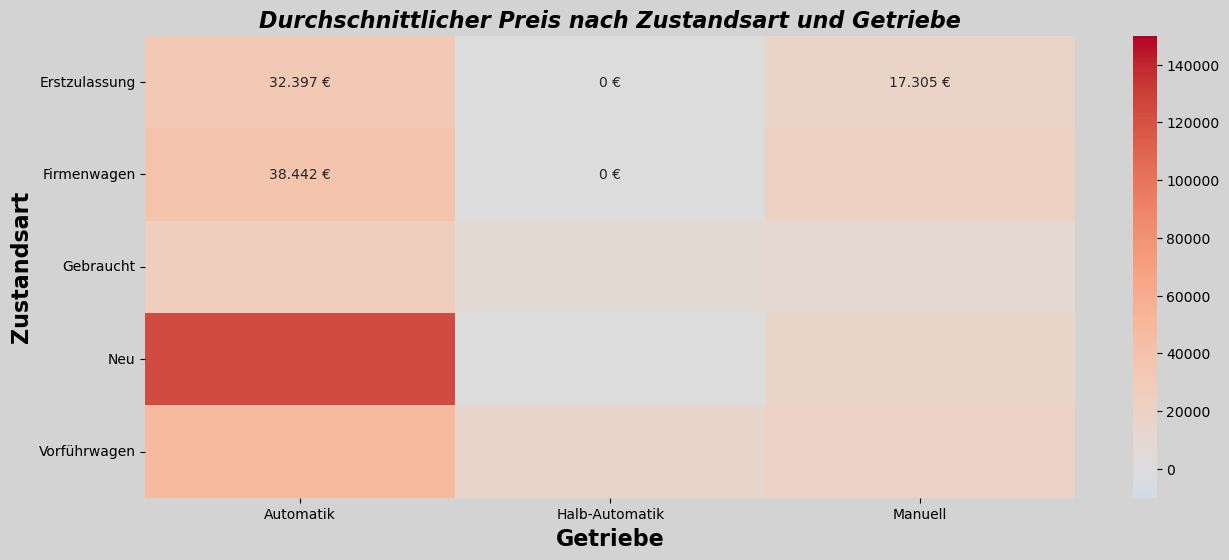

In [159]:
# Heatmap erstellen
plt.figure(figsize=(15, 6), facecolor="Lightgrey")

# Runden auf 0 Stellen nach dem Komma und in Euro formatieren
formatted_values = pivot_table.round(0).astype(int).map(lambda x: f"{x:,} €".replace(",", "."))

# Farbpalette anpassen
#cmap = sns.diverging_palette(220, 20, as_cmap=True) #Benutzerdefinierte Farbscala aus Matpoltlib für sns

ax = sns.heatmap(pivot_table,
                 annot=formatted_values,     # Verwende die formatierten Werte
                 #cmap=cmap,                  # steht für "colormap" = Farbscala 
                 center=0,                   # Zentriert die Farbskala um 0
                 vmin=-10000, vmax=150000,   # Skaliert die Farbskala
                 cmap="coolwarm",              # steht für "colormap" = Farbscala 
                                             # Yl=yellow(niederig), Or=orange(mittel), Rd=Red(hoch)
                 fmt="",                     # Formatierung der Annotationen überschreibt fmt=""
                 mask=pivot_table.isna()
                )

plt.title("Durchschnittlicher Preis nach Zustandsart und Getriebe",
          fontsize=16, 
          fontweight="bold", 
          fontstyle="italic"
          )
plt.xlabel("Getriebe",
            fontsize=16, 
            fontweight="bold"
            )
plt.ylabel("Zustandsart",
            fontsize=16, 
            fontweight="bold"
            )

# Ticks auf den Achsen kleiner darstellen
ax.tick_params(axis="both", 
               which="major", 
               labelsize=10)

plt.show()


c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\miniconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


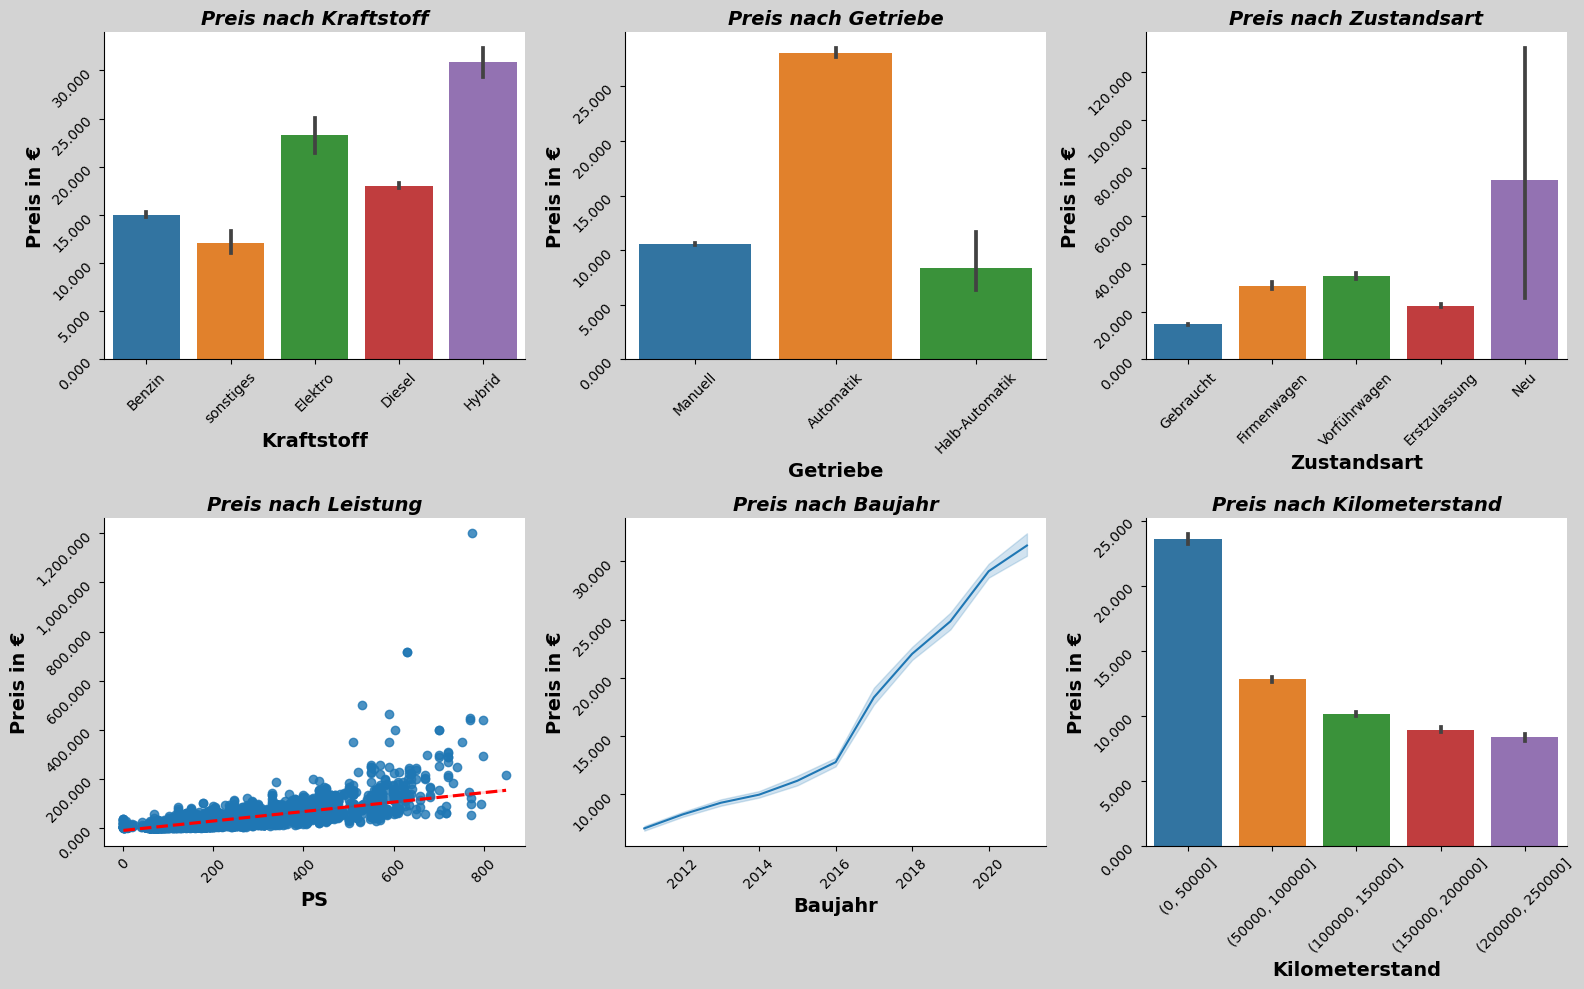

In [167]:
# Visualisierung mit Seaborn
fig, axes = plt.subplots(2, 3, figsize=(16, 10), facecolor="Lightgrey")

# Kraftstoff
sns.barplot(x="Kraftstoff", 
            y="Preis", 
            data=df, 
            ax=axes[0,0]
            )

axes[0,0].set_title("Preis nach Kraftstoff", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[0,0].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45
                      )

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[0, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[0,0].set_xlabel("Kraftstoff", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,0].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,0].spines["top"].set_visible(False)
axes[0,0].spines["right"].set_visible(False)

# Getriebe
sns.barplot(x="Getriebe", 
            y="Preis", 
            data=df, 
            ax=axes[0,1]
            )

axes[0,1].set_title("Preis nach Getriebe", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[0,1].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45
                      )

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[0, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[0,1].set_xlabel("Getriebe", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,1].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,1].spines["top"].set_visible(False)
axes[0,1].spines["right"].set_visible(False)

# Zustandsart
sns.barplot(x="Zustandsart", 
            y="Preis", 
            data=df, 
            ax=axes[0,2]
            )

axes[0,2].set_title("Preis nach Zustandsart", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[0,2].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45
                      )

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[0, 2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[0,2].set_xlabel("Zustandsart", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,2].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[0,2].spines["top"].set_visible(False)
axes[0,2].spines["right"].set_visible(False)

# Leistung (PS)
sns.regplot(x="PS", 
           y="Preis", 
           data=df, 
           ax=axes[1,0],
           line_kws={"color": "red", "linestyle": "--", "label": "Trendlinie"})

axes[1,0].set_title("Preis nach Leistung", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[1,0].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45
                      )

#axes[1,0].yaxis.set_major_formatter(FormatStrFormatter("%d"))
#axes[1,0].yaxis.set_major_formatter(FormatStrFormatter("%,.0f"))

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[1, 0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[1,0].set_xlabel("PS", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,0].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,0].spines["top"].set_visible(False)
axes[1,0].spines["right"].set_visible(False)

# Baujahr
sns.lineplot(x="Baujahr", 
             y="Preis", 
             data=df, 
             ax=axes[1,1]
             )

axes[1,1].set_title("Preis nach Baujahr", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[1,1].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45
                      )

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[1, 1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[1,1].set_xlabel("Baujahr", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,1].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,1].spines["top"].set_visible(False)
axes[1,1].spines["right"].set_visible(False)

# Kilometerstand
sns.barplot(x=pd.cut(df["Kilometerstand"], 
                     bins=[0, 50000, 100000, 150000, 200000, 250000]), 
                     y="Preis", 
                     data=df, 
                     ax=axes[1,2]
                     )

axes[1,2].set_title("Preis nach Kilometerstand", 
                    fontsize=14, 
                    fontweight="bold", 
                    fontstretch="condensed",
                    fontstyle="italic"
                    )

axes[1,2].tick_params(axis="both", 
                      which="major", 
                      labelsize=10, 
                      labelrotation=45)

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
axes[1, 2].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.3f}".format(x/1000)))

axes[1,2].set_xlabel("Kilometerstand", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,2].set_ylabel("Preis in €", 
                     fontsize=14, 
                     fontweight="bold"
                     )

axes[1,2].spines["top"].set_visible(False)
axes[1,2].spines["right"].set_visible(False)

plt.tight_layout() #Automatische Anpassung

plt.show()

### Es gibt Luxus-Fahrzeuge von Ferrari & Co., die pro Stück ganz schön viel einbringen. Welchen Anteil macht das Luxus-Segment aus?

In [133]:
df1 =df
df1

,Kilometerstand,Marke,Modell,Kraftstoff,Getriebe,Zustandsart,Preis,PS,Baujahr,Segment,Herkunftsland,Hersteller_Gruppe
8670,71113,Opel,Corsa,Benzin,Manuell,Gebraucht,5666,0,2012,KLEINWAGEN,Deutschland,Stellantis-Gruppe
38733,2000,Caravans-Wohnm,Adria,sonstiges,NaN,Gebraucht,24500,0,2016,NaN,NaN,NaN
41108,20,Others,NaN,Elektro,NaN,Gebraucht,4850,0,2018,NaN,Verschiedene Länder,NaN
43781,5729,Mercedes-Benz,C 200,Benzin,Automatik,Firmenwagen,36870,0,2020,NaN,Deutschland,Daimler AG
12128,46587,Opel,Corsa,sonstiges,Manuell,Gebraucht,7555,0,2015,KLEINWAGEN,Deutschland,Stellantis-Gruppe
...,...,...,...,...,...,...,...,...,...,...,...,...
20992,431,Ferrari,F12,Benzin,Automatik,Gebraucht,1199900,775,2017,NaN,Italien,Stellantis-Gruppe
43391,25100,Tesla,NaN,Elektro,Automatik,Gebraucht,99999,795,2020,NaN,USA,eigenständiges Unternehmen
17815,6500,Ferrari,812,Benzin,Automatik,Vorführwagen,439900,799,2021,NaN,Italien,Stellantis-Gruppe
23654,11000,Audi,R8,Benzin,Automatik,Gebraucht,295000,799,2013,SPORTWAGEN,Deutschland,Volkswagen AG


In [134]:
# Pivot-Tabelle erstellen
segment_pivot = df1.groupby("Segment")["Preis"].mean().round(2).reset_index()

# Summe aller Mittelwerte aus der Pivot-Tabelle berechnen
total_mean_price = segment_pivot["Preis"].sum().round(2)

segment_pivot

,Segment,Preis
0,GELÄNDEWAGEN,35972.64
1,GROSSRAUM-VANS,16769.19
2,KLEINWAGEN,9763.19
3,KOMPAKTKLASSE,12708.79
4,MINI-VANS,11587.77
5,MINIS,8216.20
6,MITTELKLASSE,19202.64
7,OBERE MITTELKLASSE,27161.03
8,OBERKLASSE,59991.90
9,SPORTWAGEN,53890.28


In [135]:
total_mean_price

308893.8

<Figure size 2000x1000 with 0 Axes>

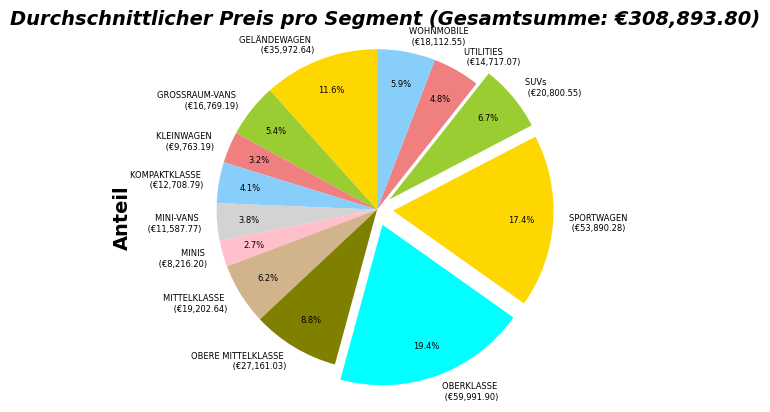

In [162]:
# Kuchendiagramm erstellen
plt.figure(figsize=(20,10), facecolor="Lightgrey")

# Farben für die einzelnen Segmente definieren
colors = ["gold", "yellowgreen", "lightcoral", "lightskyblue", 
          "lightgray", "pink", "tan", "olive", "cyan"
          ]

# Die Kuchenstücke für SUVs, SPORTWAGEN und OBERKLASSE etwas aus dem Kuchen hervorheben
explode = [0.1 if segment in ["SUVs", "SPORTWAGEN", "OBERKLASSE"] 
           else 0 
           for segment in segment_pivot["Segment"]
           ]
# Neuformatierung der Ticks inkl. Durchschnittspreis
label = [f"{segment} \n (€{preis:,.2f})" 
         for segment, preis in zip(segment_pivot["Segment"], 
                                   segment_pivot["Preis"]
                                   )
        ]

segment_pivot.plot(kind="pie", 
                   y="Preis", 
                   labels=label, 
                   autopct='%1.1f%%',
                   labeldistance=1.1, # Abstand der Beschriftungen vom Zentrum
                   pctdistance=0.8, # Abstand der Prozentsätze vom Zentrum 
                   startangle=90, 
                   colors=colors,
                   explode=explode,
                   fontsize=6,
                   legend = False
                   )

plt.title(f"Durchschnittlicher Preis pro Segment (Gesamtsumme: €{total_mean_price:,.2f})",
          fontsize=14, 
          fontweight="bold", 
          fontstretch="condensed",
          fontstyle="italic"
          )

# Bezeichnung für den "Anteil" ändern und Formatierung anpassen
plt.ylabel("Anteil", 
           fontsize=14, 
           fontweight="bold",
           x=-5
           )

plt.axis("equal")

# plt.legend(bbox_to_anchor=(1.2, 1), # Legende außerhalb des Diagramms platzieren und verkleinern
#            fontsize=5
#            )
plt.tick_params(axis="both", 
                which="major", # Ticks verkleinern
                labelsize=8
                )
plt.show()

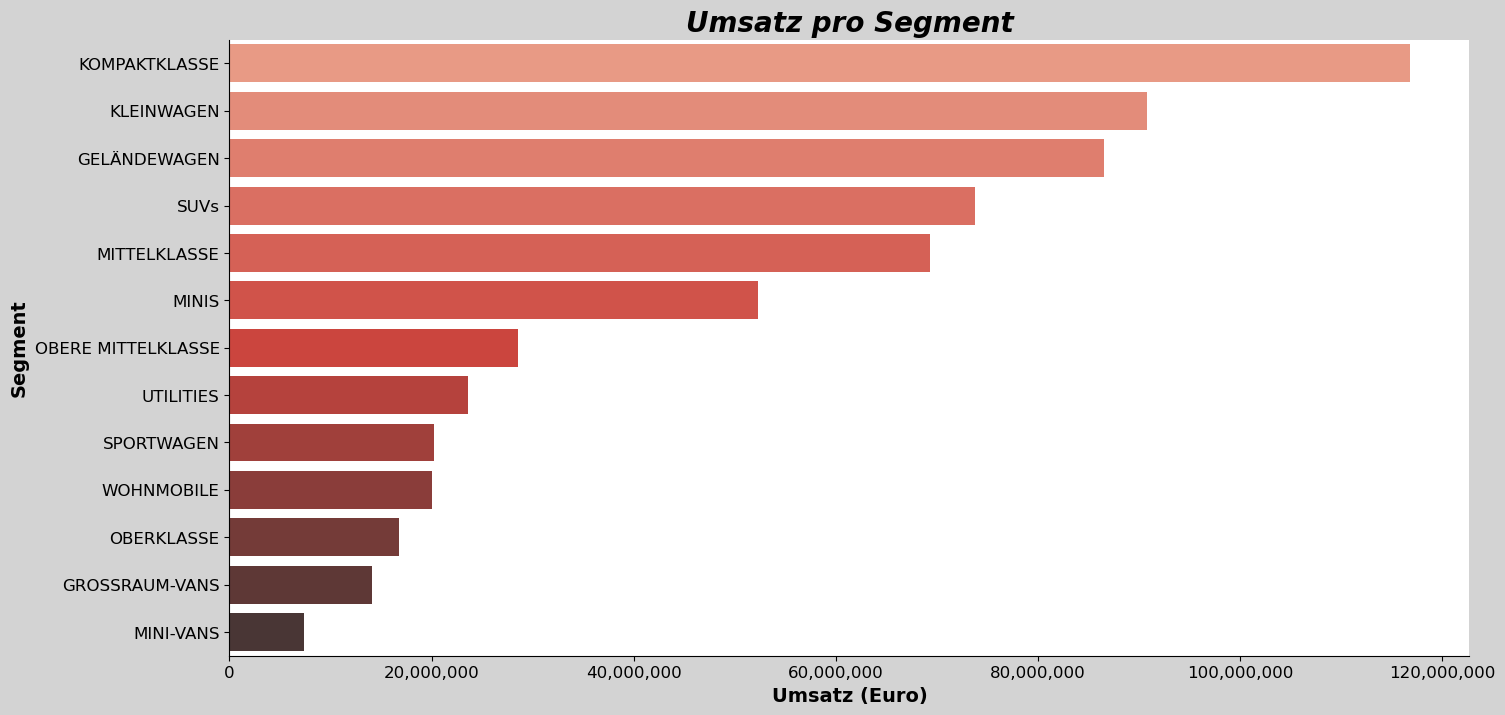

In [163]:
# Berechne den Umsatz pro Segment
segment_sales = df.groupby("Segment")["Preis"].sum().sort_values(ascending=False)

# Erstelle das horizontale Balkendiagramm
plt.figure(figsize=(16,8), facecolor="Lightgrey")
ax = sns.barplot(x=segment_sales.values, 
                y=segment_sales.index, 
                orient="h", 
                palette="Reds_d")

# Formatiere die x-Achsenbeschriftung, um Exponentialform zu vermeiden
plt.gca().xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))

# Beschriftungen
plt.title("Umsatz pro Segment", 
          fontsize=20, 
          fontweight="bold", 
          fontstretch="condensed",
          fontstyle="italic"
          )

plt.xlabel("Umsatz (Euro)", 
           fontsize=14, 
           fontweight="bold"
           )

plt.ylabel("Segment", 
           fontsize=14, 
           fontweight="bold"
           )

plt.tick_params(axis="both",
                which="major", 
                labelsize=12
                )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

In [138]:
# Daten nach Segment und Preis gruppieren und sortieren
sorted_data = df.sort_values(["Segment", "Preis"], ascending=True)

# Die günstigsten Modelle pro Segment ausgeben
for segment, segment_data in sorted_data.groupby("Segment"):
    print(f"Segment: {segment}")
    print(segment_data[["Marke", "Modell", "Preis"]].head(10))
    print()

Segment: GELÄNDEWAGEN
            Marke     Modell  Preis
19635      Subaru   Forester   2500
30010      Subaru   Forester   4450
25887      Subaru   Forester   4750
25431  Mitsubishi  Outlander   5499
360        Others        NaN   5500
4358         Jeep    Compass   5500
12062      Nissan    X-trail   5700
14090  Volkswagen     Tiguan   5950
32844      Subaru   Forester   5999
15720  Mitsubishi  Outlander   5999

Segment: GROSSRAUM-VANS
            Marke         Modell  Preis
20877  Volkswagen         Touran   1396
25041     Renault   Grand scenic   2500
33497     Renault   Grand espace   2699
19801     Renault   Grand scenic   3150
704          Opel  Zafira tourer   3299
22559     Renault         Espace   3500
608    Volkswagen         Touran   3999
21550  Volkswagen         Touran   4000
28336  Volkswagen         Touran   4000
26091     Renault   Grand scenic   4050

Segment: KLEINWAGEN
         Marke        Modell  Preis
17205  Peugeot           206   1299
23630     Opel         C

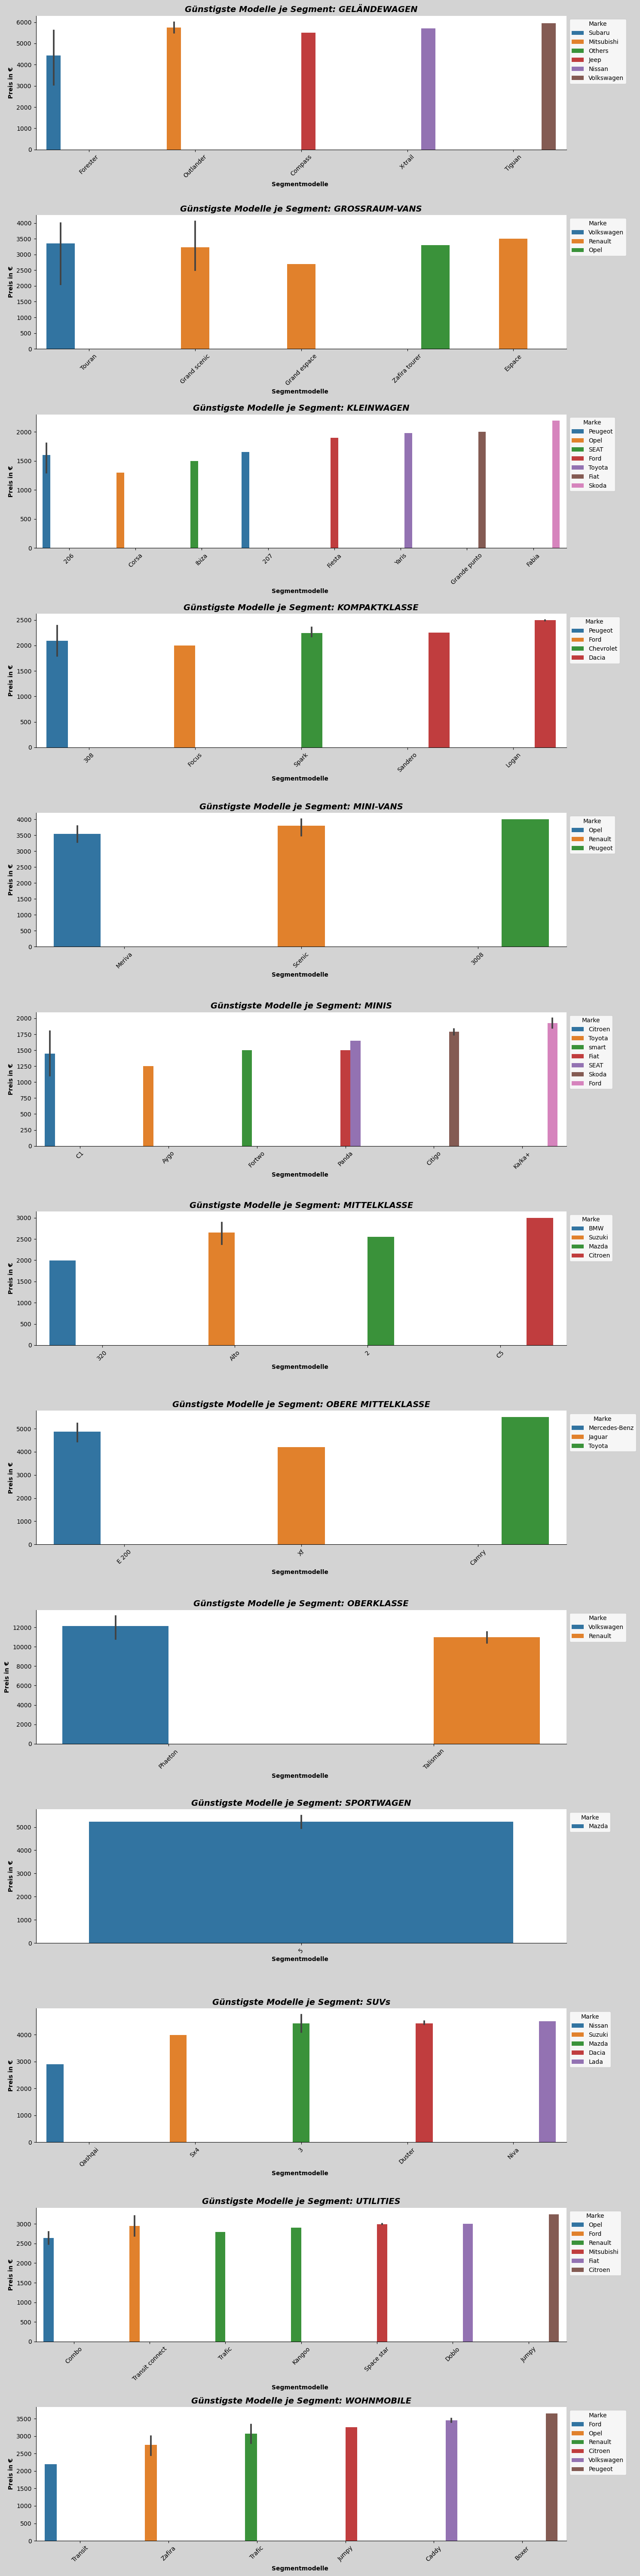

In [164]:
# Die günstigsten Modelle pro Segment ausgeben und in Balkengrafiken umwandeln
fig, axes = plt.subplots(len(sorted_data.Segment.unique()) - 1, 1, 
                         figsize=(15, 60), facecolor="Lightgrey")

for i, (segment, segment_data) in enumerate(sorted_data.groupby("Segment")):
    ax = axes[i]
    
    # Die 10 günstigsten Modelle pro Segment auswählen
    top_models = segment_data[["Marke", "Modell", "Preis"]].head(10)
    
    # Balkengrafik erstellen
    sns.barplot(x="Modell", 
                y="Preis", 
                hue="Marke", 
                data=top_models, 
                ax=ax
                )
    #Beschriftung erstellen
    ax.set_title(f"Günstigste Modelle je Segment: {segment}", 
                 fontweight="bold", 
                 fontsize=14, 
                 style="italic"
                 )
    
    ax.set_xlabel("Segmentmodelle ", 
                  fontweight="bold", 
                  fontsize=10
                  )
    
    ax.set_ylabel("Preis in €", 
                  fontweight="bold", 
                  fontsize=10
                  )
    
    ax.tick_params(axis='x', 
                   rotation=45
                   )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Legende erstellen
    ax.legend(title="Marke", 
              loc="upper left", 
              bbox_to_anchor=(1, 1)
              )

plt.tight_layout()

plt.show()

In [140]:
# Daten nach Segment und Preis gruppieren und sortieren
sorted_data2 = df.sort_values(["Segment", "Preis"], ascending=False)

# Die teuersten Modelle pro Segment ausgeben
for segment, segment_data in sorted_data2.groupby("Segment"):
    print(f"Segment: {segment}")
    print(segment_data[["Marke", "Modell", "Preis"]].head(10))
    print()

Segment: GELÄNDEWAGEN
             Marke                   Modell   Preis
30903  Lamborghini                     Urus  244000
43394      Bentley                 Bentayga  235900
45113        Aston               Martin dbx  224900
18548      Bentley                 Bentayga  192780
43316      Bentley                 Bentayga  188888
43315        Aston               Martin dbx  187900
42147      Porsche                  Cayenne  167300
45165         Land        Rover range rover  162900
5753          Land  Rover range rover sport  142990
44636      Porsche                  Cayenne  132700

Segment: GROSSRAUM-VANS
               Marke Modell  Preis
45180  Mercedes-Benz  V 300  85904
45079  Mercedes-Benz  V 300  84748
44564  Mercedes-Benz  V 300  76870
44554  Mercedes-Benz  V 300  71370
41937  Mercedes-Benz  V 300  67890
44549  Mercedes-Benz  V 300  67870
2021   Mercedes-Benz  V 300  67776
43324  Mercedes-Benz  V 300  63636
23358  Mercedes-Benz  V 300  63490
42081  Mercedes-Benz  V 300  62

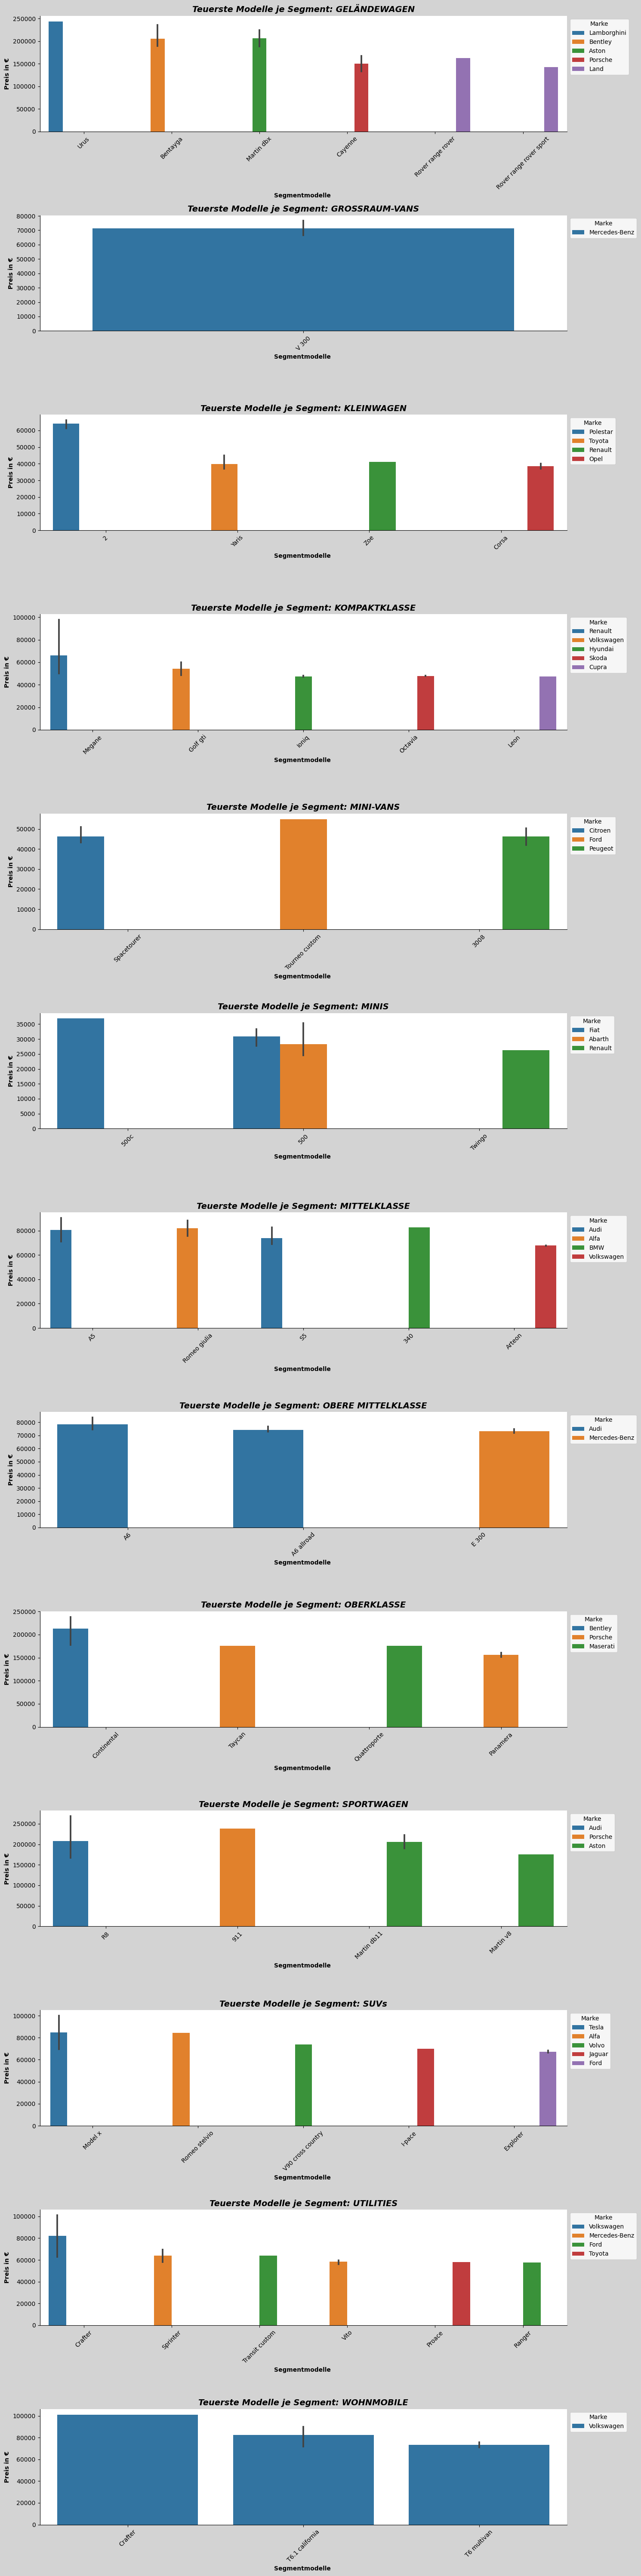

In [165]:
# Die teuersten Modelle pro Segment ausgeben und in Balkengrafiken umwandeln
fig, axes = plt.subplots(len(sorted_data2.Segment.unique()) - 1, 1, 
                         figsize=(15, 60), facecolor="Lightgrey"
                         )

for i, (segment, segment_data) in enumerate(sorted_data2.groupby("Segment")):
    ax = axes[i]
    
    # Die 10 teuersten Modelle pro Segment auswählen
    top_models = segment_data[["Marke", "Modell", "Preis"]].head(10)
    
    # Balkengrafik erstellen
    sns.barplot(x="Modell", 
                y="Preis", 
                hue="Marke", 
                data=top_models, 
                ax=ax
                )
    #Beschriftung erstellen
    ax.set_title(f"Teuerste Modelle je Segment: {segment}", 
                 fontweight="bold", 
                 fontsize=14, 
                 style="italic"
                 )
    
    ax.set_xlabel("Segmentmodelle ", 
                  fontweight="bold", 
                  fontsize=10
                  )
    
    ax.set_ylabel("Preis in €", 
                  fontweight="bold", 
                  fontsize=10
                  )
    
    ax.tick_params(axis='x', 
                   rotation=45
                   )

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    # Legende erstellen
    ax.legend(title="Marke", 
              loc="upper left", 
              bbox_to_anchor=(1, 1)
              )

plt.tight_layout()

plt.show()

In [142]:
df

,Kilometerstand,Marke,Modell,Kraftstoff,Getriebe,Zustandsart,Preis,PS,Baujahr,Segment,Herkunftsland,Hersteller_Gruppe
8670,71113,Opel,Corsa,Benzin,Manuell,Gebraucht,5666,0,2012,KLEINWAGEN,Deutschland,Stellantis-Gruppe
38733,2000,Caravans-Wohnm,Adria,sonstiges,NaN,Gebraucht,24500,0,2016,NaN,NaN,NaN
41108,20,Others,NaN,Elektro,NaN,Gebraucht,4850,0,2018,NaN,Verschiedene Länder,NaN
43781,5729,Mercedes-Benz,C 200,Benzin,Automatik,Firmenwagen,36870,0,2020,NaN,Deutschland,Daimler AG
12128,46587,Opel,Corsa,sonstiges,Manuell,Gebraucht,7555,0,2015,KLEINWAGEN,Deutschland,Stellantis-Gruppe
...,...,...,...,...,...,...,...,...,...,...,...,...
20992,431,Ferrari,F12,Benzin,Automatik,Gebraucht,1199900,775,2017,NaN,Italien,Stellantis-Gruppe
43391,25100,Tesla,NaN,Elektro,Automatik,Gebraucht,99999,795,2020,NaN,USA,eigenständiges Unternehmen
17815,6500,Ferrari,812,Benzin,Automatik,Vorführwagen,439900,799,2021,NaN,Italien,Stellantis-Gruppe
23654,11000,Audi,R8,Benzin,Automatik,Gebraucht,295000,799,2013,SPORTWAGEN,Deutschland,Volkswagen AG


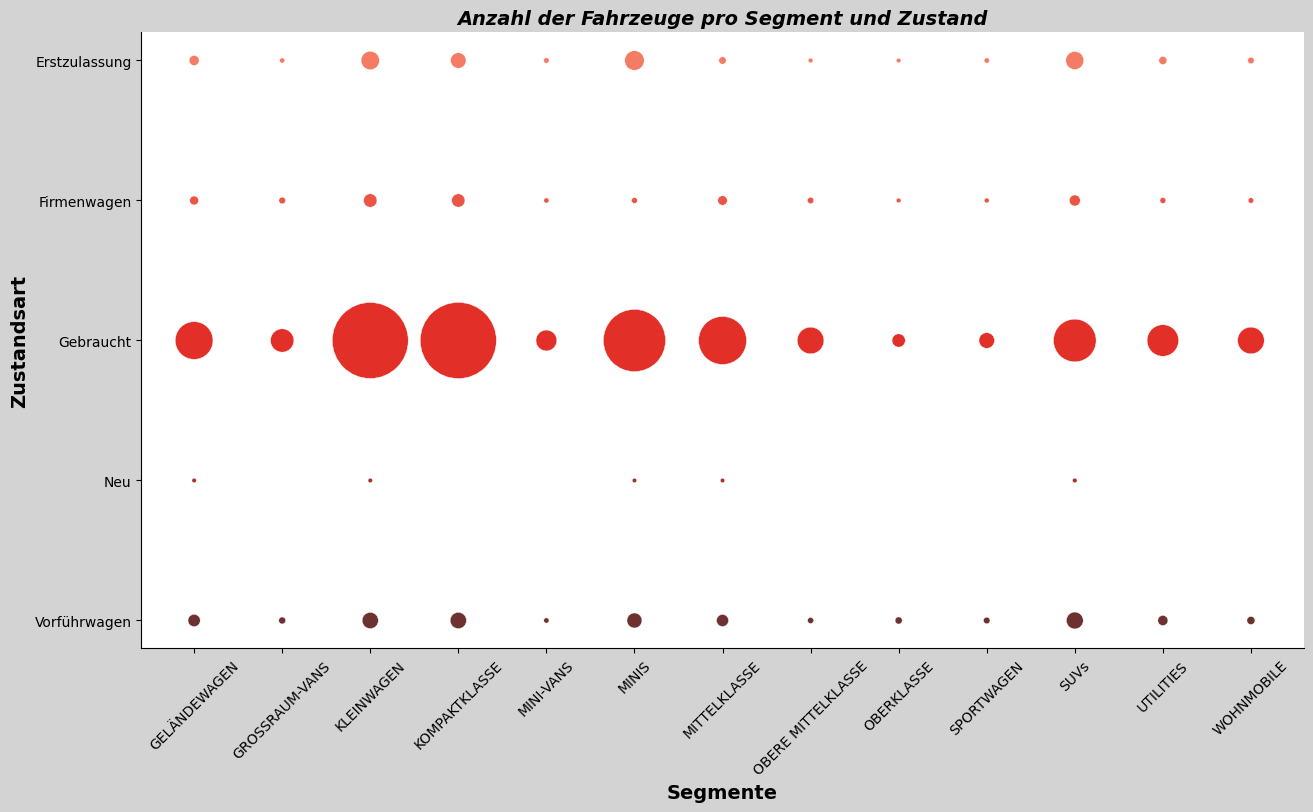

In [166]:
# Gruppierung und/oder Pivotierung des dataframes so, dass ein scatterplot die Anzahl der Fahrzeuge in den Segmenten 
#anzeigt, die abhängig von der Spalte Segment gebraucht, neu, oder z.B. Firmenfahrzeug sind.

# Gruppieren nach Segment und Zustandsart
segment_zustand = df.groupby(["Segment", "Zustandsart"]).size().reset_index(name="count")

# Visualisieren als Scatterplot
plt.figure(figsize=(15, 8), facecolor="Lightgrey")

scatter = sns.scatterplot(x="Segment", 
                         y="Zustandsart",
                         hue="Zustandsart",
                         size="count",
                         data=segment_zustand,
                         palette="Reds_d",
                         sizes=(10, 3000),
                         legend=False)

plt.title("Anzahl der Fahrzeuge pro Segment und Zustand",
          fontsize=14, 
          fontweight="bold", 
          fontstretch="condensed",
          fontstyle="italic")

plt.xlabel("Segmente", 
           fontsize=14, 
           fontweight="bold")

scatter.tick_params(axis='x', 
                    rotation=45,
                    labelsize=6)

plt.ylabel("Zustandsart", 
           fontsize=14, 
           fontweight="bold")

plt.tick_params(axis="both",
                which="major", 
                labelsize=10)

scatter.spines["top"].set_visible(False)
scatter.spines["right"].set_visible(False)

plt.show()